In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preliminary EDA for IGAC project

In [3]:
df = pd.read_excel("diccionario.xlsx")
df

,ID_NOMBRES_GEO,NOMBRE,DESCRIPCION,CODIGO,TIPO,FUENTE,NOMBRE_BUSQUEDA
0,1,SAN GABRIEL DE CAÑO COLORADO,SAN GABRIEL DE CAÑO COLORADO. Sitio en el muni...,97001,Sitio,NaN,SAN GABRIEL DE CAÑO COLORADO
1,2,YAPÚ,"YAPÚ. Caño en el municipio de Mitú, departamen...",97001,Caño,NaN,YAPÚ
2,3,SAÑAÑA,SAÑAÑA. Caño que sirve de límite entre el muni...,97,Caño,NaN,SAÑAÑA
3,4,ARARÁ,"ARARÁ. Sitio en el municipio de Mitú, departam...",97001,Sitio,NaN,ARARÁ
4,5,GUADALAJARA,"GUADALAJARA. Sitio en el municipio de Mitú, de...",97001,Sitio,NaN,GUADALAJARA
...,...,...,...,...,...,...,...
231683,554832,WIRAVAZÚ,"WIRAVAZÚ. Sitio en el municipio de Mitú, depar...",97001,Sitio,NaN,WIRAVAZÚ
231684,554833,BARRANCO COLORADO,BARRANCO COLORADO. Sitio en el municipio de Mi...,97001,Sitio,NaN,BARRANCO COLORADO
231685,554834,TATÚ,"TATÚ. Sitio en el municipio de Mitú, departame...",97001,Sitio,NaN,TATÚ
231686,554835,SAN JORGE,"SAN JORGE. Sitio en el municipio de Mitú, depa...",97001,Sitio,NaN,SAN JORGE


In [4]:
df.describe(include="all")

,ID_NOMBRES_GEO,NOMBRE,DESCRIPCION,CODIGO,TIPO,FUENTE,NOMBRE_BUSQUEDA
count,231688.000000,231688,231688,231688,231688,0.0,231688
unique,NaN,63791,231140,1162,151,NaN,63791
top,NaN,LA ESPERANZA,LA ESPERANZA. Sitio en el municipio de Bolívar...,44847,Sitio,NaN,ESPERANZA (LA)
freq,NaN,1630,4,3346,109788,NaN,1630
mean,363600.123127,NaN,NaN,NaN,NaN,NaN,NaN
std,162035.285340,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,343087.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,406385.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,466072.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.iloc[0,2]

'SAN GABRIEL DE CAÑO COLORADO. Sitio en el municipio de Mitú, departamento del Vaupés, al sur de la cabecera municipal. Comunicado a ella por vía fluvial. Allí funciona un establecimiento educativo.'

In [6]:
len(df["TIPO"].unique())

151

In [7]:
df[df["DESCRIPCION"].str.contains('municipio de Chaparral')]["DESCRIPCION"]

34893     CHONTADURO. Vereda en el municipio de Chaparra...
34898     LEMAYA. Vereda en el municipio de Chaparral, d...
34900     LA ESPERANZA. Sitio en el municipio de Chaparr...
34902     LA LAGUNA. Sitio en el municipio de Chaparral,...
34905     YAGUARÁ. Vereda en el municipio de Chaparral, ...
                                ...                        
208716    SANTA INÉS. Sitio en el municipio de Chaparral...
210729    AMOYÁ LA ESPERANZA.Central Eléctrica en el mun...
210967    NAVAS PARDO. Aeródromo clase F, ubicado al est...
211587    TRES ESTRELLAS. Cerro de la cordillera Central...
212402    LA LEJÍA. Puente sobre el río Amoyá en el muni...
Name: DESCRIPCION, Length: 746, dtype: object

## Toponyms of municipio de Chaparral

In [8]:
chaparral = df.loc[df["DESCRIPCION"].str.contains("municipio de Chaparral"),:]
chaparral

,ID_NOMBRES_GEO,NOMBRE,DESCRIPCION,CODIGO,TIPO,FUENTE,NOMBRE_BUSQUEDA
34893,38544,CHONTADURO,CHONTADURO. Vereda en el municipio de Chaparra...,73168,Vereda,NaN,CHONTADURO
34898,38549,LEMAYA,"LEMAYA. Vereda en el municipio de Chaparral, d...",73168,Vereda,NaN,LEMAYA
34900,38551,LA ESPERANZA,LA ESPERANZA. Sitio en el municipio de Chaparr...,73168,Sitio,NaN,ESPERANZA (LA)
34902,38553,LA LAGUNA,"LA LAGUNA. Sitio en el municipio de Chaparral,...",73168,Sitio,NaN,LAGUNA (LA)
34905,38556,YAGUARÁ,"YAGUARÁ. Vereda en el municipio de Chaparral, ...",73168,Vereda,NaN,YAGUARÁ
...,...,...,...,...,...,...,...
208716,527342,SANTA INÉS,SANTA INÉS. Sitio en el municipio de Chaparral...,73168,Sitio,NaN,SANTA INÉS
210729,529592,AMOYÁ LA ESPERANZA,AMOYÁ LA ESPERANZA.Central Eléctrica en el mun...,73168,Central Eléctrica,NaN,AMOYÁ LA ESPERANZA
210967,530070,NAVAS PARDO,"NAVAS PARDO. Aeródromo clase F, ubicado al est...",73168,Aeropuerto,NaN,NAVAS PARDO
211587,531446,TRES ESTRELLAS,TRES ESTRELLAS. Cerro de la cordillera Central...,73168,Cerro,NaN,TRES ESTRELLAS


In [9]:
chaparral = chaparral.drop(columns="FUENTE")

In [10]:
len(chaparral["ID_NOMBRES_GEO"].unique())

746

In [11]:
len(chaparral["NOMBRE"].unique())

538

In [12]:
len(chaparral["TIPO"].unique())

25

### Datapoints summary
* Number of rows = 746
* Unique toponyms = 538
* Unique types of places = 25

In [13]:
#df2 = chaparral.grorupby(by="TIPO").count()
#sns.barplot()

In [14]:
df2 = chaparral.groupby(by="TIPO").count()["NOMBRE"].reset_index().sort_values("NOMBRE", ascending=False)

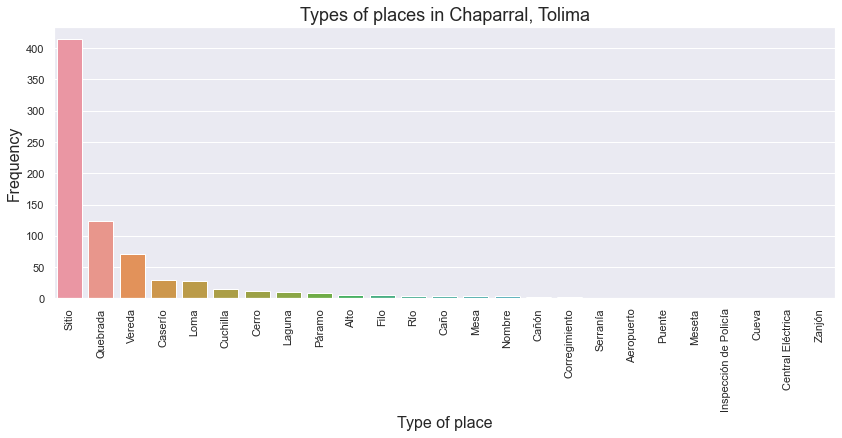

In [16]:
sns.set()
fig,ax = plt.subplots(figsize=(14,5))
ax = sns.barplot(x="TIPO", y="NOMBRE", data=df2)
ax.set_title("Types of places in Chaparral, Tolima", fontsize=18)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_xlabel("Type of place", fontsize=16)
_ = ax.set_xticklabels(list(df2["TIPO"].unique()),rotation=90)

In [80]:
(chaparral["NOMBRE"].value_counts()[0:5])

EL DIAMANTE     7
EL PORVENIR     7
LA PRADERA      7
BUENOS AIRES    6
CARBONAL        5
Name: NOMBRE, dtype: int64

In [82]:
chaparral[chaparral["NOMBRE"]=="EL PORVENIR"]

,ID_NOMBRES_GEO,NOMBRE,DESCRIPCION,CODIGO,TIPO,NOMBRE_BUSQUEDA
35341,38997,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
72693,358297,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
72759,358368,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
72812,358421,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
72830,358439,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
104674,394768,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
104675,394769,EL PORVENIR,EL PORVENIR. Sitio en el municipio de Chaparra...,73168,Sitio,PORVENIR (EL)
